Contents

0. Intro
1. Visualization
2. Completing features
3. Feature engineering (AgeBand)
4. Converting features
5. Dropping features
6. Training (PLAN: Survived ~ Age + Sex + Pclass + FamilySize)
7. Submitting

In [181]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [182]:
train_df = pd.read_csv('../testdata/titanic.csv', index_col='PassengerId')
test_df = pd.read_csv('../testdata/test.csv', index_col='PassengerId')
combine_df = [train_df, test_df]
full_df = train_df.append(test_df, ignore_index=True)

train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


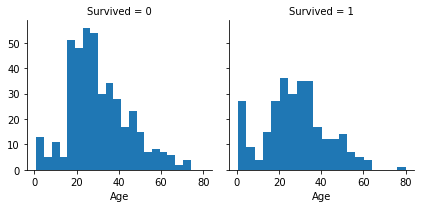

In [184]:
# Age
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

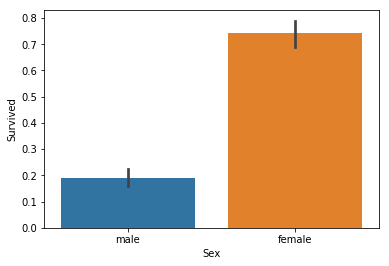

In [185]:
# Sex
sns.barplot(x="Sex", y="Survived", data=train_df)

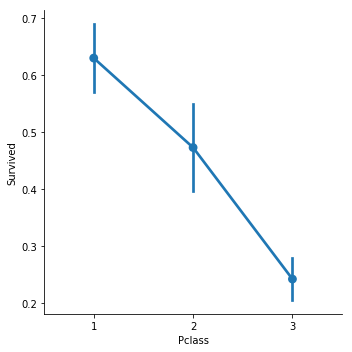

In [186]:
# Pclass
sns.factorplot('Pclass', 'Survived', order=[1, 2, 3], data=train_df, size=5)

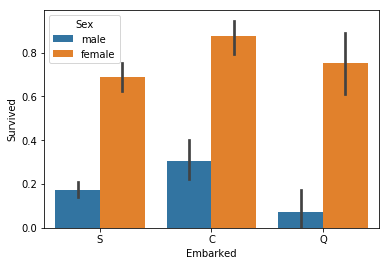

In [187]:
# Embarked
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df)

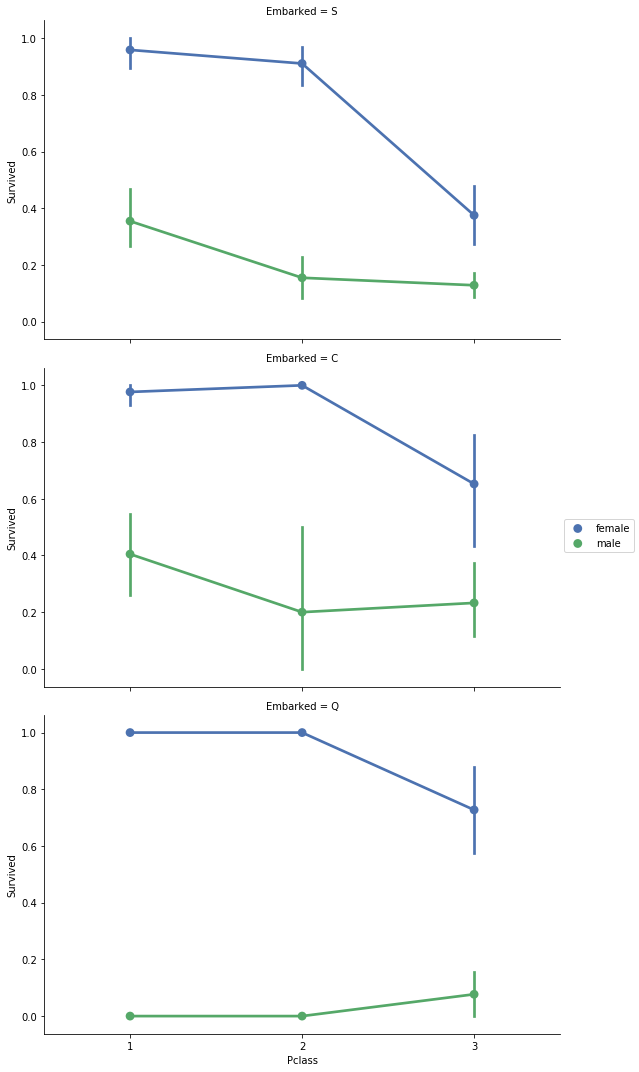

In [188]:
# Complex-1
grid = sns.FacetGrid(train_df, row='Embarked', size=5, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', 
         order=[1, 2, 3], hue_order=["female", "male"])
grid.add_legend()

plt.show()

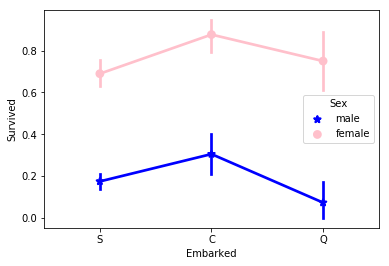

In [189]:
# Complex-2
sns.pointplot(x="Embarked", y="Survived", hue="Sex", data=train_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"])

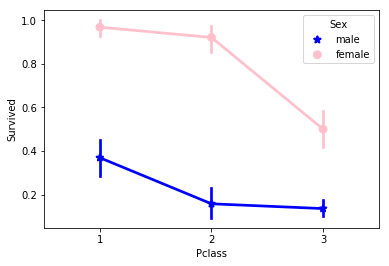

In [190]:
# Complex-3
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"]);

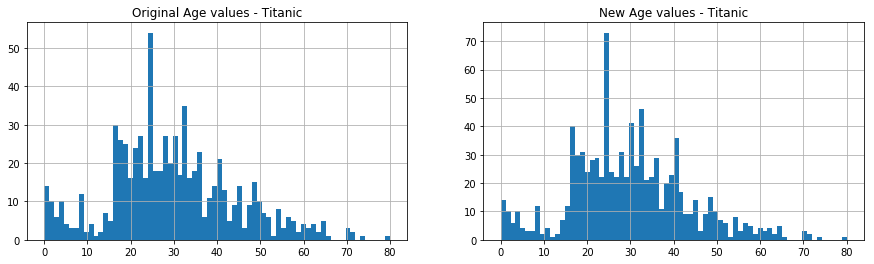

In [191]:
# Age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# get average, std, and number of NaN values in train_df
average_age_titanic   = train_df["Age"].mean()
std_age_titanic       = train_df["Age"].std()
count_nan_age_titanic = train_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train_df.loc[np.isnan(train_df["Age"]), 'Age'] = rand_1
test_df.loc[np.isnan(test_df["Age"]), 'Age'] = rand_2

# convert from float to int
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)
        
# plot new Age Values
train_df['Age'].hist(bins=70, ax=axis2)

In [192]:
# Sex
train_df['Sex'].hasnans & test_df['Sex'].hasnans

False

In [193]:
# Pclass
train_df['Pclass'].hasnans & test_df['Pclass'].hasnans

False

In [194]:
# Embarked
freq_port = train_df.Embarked.dropna().mode()[0]
for df in combine_df:
    df['Embarked'] = df['Embarked'].fillna(freq_port)

In [195]:
# Fare
for df in combine_df:
    df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)

In [196]:
# AgeBand-1: analyze
full_df['AgeBand'] = pd.cut(full_df['Age'], 5)
full_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.369942
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


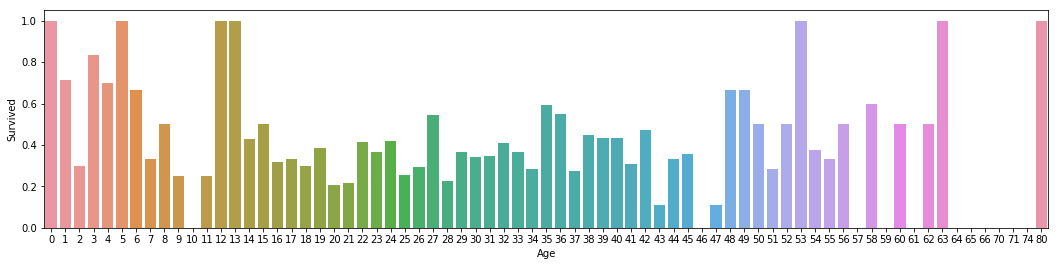

In [197]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [198]:
# AgeBand-2: group
train_df.tail()
for df in combine_df:
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S


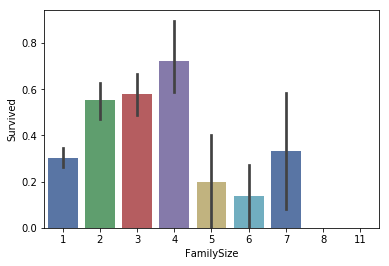

In [199]:
# FamilySize
for df in combine_df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
sns.barplot(x='FamilySize', y='Survived', data=train_df, palette='deep')

In [200]:
# Sex
for df in combine_df:
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0}).astype(int)

In [201]:
# Embarked
for df in combine_df:
    df['Embarked'] = df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2}).astype(int)

In [202]:
train_df = train_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [203]:
X_all = train_df.drop(['Survived'], axis=1)
y_all = train_df['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

# X_train   -   80% predictors
# X_test    -   80% target
# y_train   -   20% predictors
# y_test    -   20% target

In [204]:
# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {
                'n_estimators': [4, 6, 9], 
                'max_features': ['log2', 'sqrt', 'auto'], 
                'criterion': ['entropy', 'gini'],
                'max_depth': [2, 3, 5, 10], 
                'min_samples_split': [2, 3, 5],
                'min_samples_leaf': [1, 5, 8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.815642458101


In [206]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.797752808988764
Fold 3 accuracy: 0.797752808988764
Fold 4 accuracy: 0.8202247191011236
Fold 5 accuracy: 0.8202247191011236
Fold 6 accuracy: 0.797752808988764
Fold 7 accuracy: 0.797752808988764
Fold 8 accuracy: 0.7528089887640449
Fold 9 accuracy: 0.8426966292134831
Fold 10 accuracy: 0.8202247191011236
Mean Accuracy: 0.8024968789013732


In [207]:
test_df.reset_index(level=0, inplace=True)

ids = test_df['PassengerId']
predictions = clf.predict(test_df.drop('PassengerId', axis=1))

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [210]:
output.to_csv('../output/titanic-predictions-basic.csv', index=False)